In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
import itertools

In [2]:
predictions = []
oofs = []

weights = {'rf':2,'gb':1,'svm':1}
models = list(weights.keys())
weights_list = list(weights.values())

for model in models:
    for index in range(5):
        with open(f'predictions2/{model}_{index}.pkl','rb') as f:
            predictions.append(pickle.load(f))
    with open(f'oofs2/{model}.pkl','rb') as f:
        oofs.append(pickle.load(f))

In [3]:
# # find best weights

# weights_rf = [1,2,3,4,5]
# weights_gb = [1,2,3,4,5]
# weights_svm = [1,2,3,4,5]

# train_df = pd.read_csv('data/cleaned_train.csv',index_col=0)
# event_train = train_df[train_df['class2'] == 'event']
# y3 = event_train['class4'].map({'Ia':0,'Ib':1,'II':2})

# current_best = 0
              
# for weight_rf in weights_rf:
#     for weight_gb in weights_gb:
#         for weight_svm in weights_svm:
#             weights = {'rf':weight_rf,'gb':weight_gb,'svm':weight_svm}
#             models = list(weights.keys())
#             weights_list = list(weights.values())
#             oof3 = []

#             for index in range(len(y3)):
#                 counter = [0,0,0]
#                 preds = [oofs[i][index] for i in range(len(oofs))]
#                 for i,pred in enumerate(preds):
#                     counter[0] += weights_list[i] * pred[0]
#                     counter[1] += weights_list[i] * pred[1]
#                     counter[2] += weights_list[i] * pred[2]

#                 oof3.append(np.argmax(counter))

#             acc3 = accuracy_score(y3,oof3)
#             if acc3 > current_best:
#                 current_best = acc3
#                 best_rf = weight_rf
#                 best_gb = weight_gb
#                 best_svm = weight_svm

# best_rf,best_gb,best_svm,current_best

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
# Cross validation score, used as estimate of final accuracy
train_df = pd.read_csv('data/cleaned_train.csv',index_col=0)
event_train = train_df[train_df['class2'] == 'event']
y3 = event_train['class4'].map({'Ia':0,'Ib':1,'II':2})
oof3 = []
confidences = []

for index in range(len(y3)):
    counter = [0,0,0]
    preds = [oofs[i][index] for i in range(len(oofs))]
    for i,pred in enumerate(preds):
        counter[0] += weights_list[i] * pred[0]
        counter[1] += weights_list[i] * pred[1]
        counter[2] += weights_list[i] * pred[2]

    oof3.append(np.argmax(counter))

print("3 class")
print("ACC:",accuracy_score(y3,oof3))
print(confusion_matrix(y3,oof3))

print()
with open('results/acc2.pkl','rb') as f:
    acc2 = pickle.load(f)

print("4 class (APPROX)")
print("ACC:",accuracy_score(y3,oof3) * 0.5 + acc2 * 0.5)


3 class
ACC: 0.5764192139737991
[[ 8  4 17]
 [ 2 30 51]
 [ 2 21 94]]

4 class (APPROX)
ACC: 0.7390829694323144


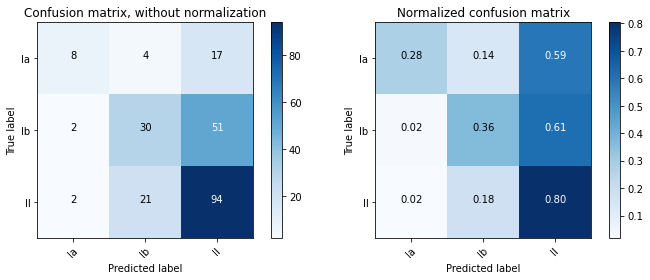

In [6]:
cnf_matrix3 = confusion_matrix(y3, oof3)
# Compute confusion matrix
class_names3 = ['Ia', 'Ib', 'II']

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 4))

np.set_printoptions(precision=4)
# Plot non-normalized confusion matrix
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix3, classes=class_names3,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix3, classes=class_names3, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("Fig/cm4.png", dpi = 1080)
plt.show()

In [7]:
stage2_predictions = []
length = len(predictions[0])

for index in range(length):
    counter = [0,0,0]
    preds = [predictions[i][index] for i in range(len(predictions))]
    for i,pred in enumerate(preds):
        weight_index = int(i / 5) 
        counter[0] += weights_list[weight_index] * pred[0]
        counter[1] += weights_list[weight_index] * pred[1]
        counter[2] += weights_list[weight_index] * pred[2]
    stage2_predictions.append(np.argmax(counter) + 1)
        
len(stage2_predictions)

452

In [8]:
with open('results/stage1_predictions.pkl','rb') as f:
    stage1_predictions = pickle.load(f)

final_predictions = []
index = 0

for prediction in stage1_predictions:
    if prediction == 1:
        final_predictions.append(stage2_predictions[index])
        index += 1
    else:
        final_predictions.append(0)

print(index)

452


In [9]:
with open('results/final_predictions.pkl','wb') as f:
    pickle.dump(final_predictions,f)